# Content
**We will analyze ten economic and social indicators collected for each province. Because these indicators are highly correlated, we will use principal component analysis (PCA) to reduce redundancies and highlight patterns that are not apparent in the raw data. After visualizing the patterns, we will use k-means clustering to partition the provinces into groups with similar development levels.**

**These results can be used to plan public policy by helping allocate resources to develop infrastructure, education, and welfare programs**


In [14]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
#K Means Clustering
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')

# Importing data

In [4]:
df_Arg = pd.read_csv("C:\\Users\\SARVESH SURVE\\OneDrive\\Desktop\\data\\Kaggle data set\\argentina.csv")

In [5]:
df_Arg.keys()

Index(['province', 'gdp', 'illiteracy', 'poverty', 'deficient_infra',
       'school_dropout', 'no_healthcare', 'birth_mortal', 'pop',
       'movie_theatres_per_cap', 'doctors_per_cap'],
      dtype='object')

In [6]:
df_Arg.shape

(22, 11)

In [7]:
df_Arg.head()

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
0,Buenos Aires,2.926899e+08,1.38324,8.167798,5.511856,0.766168,48.7947,4.4,15625084,0.000006,0.004836
1,Catamarca,6.150949e+06,2.34414,9.234095,10.464484,0.951963,45.0456,1.5,367828,0.000005,0.004502
2,Córdoba,6.936374e+07,2.71414,5.382380,10.436086,1.035056,45.7640,4.8,3308876,0.000011,0.010175
3,Corrientes,7.968013e+06,5.60242,12.747191,17.438858,3.864265,62.1103,5.9,992595,0.000004,0.004495
4,Chaco,9.832643e+06,7.51758,15.862619,31.479527,2.577462,65.5104,7.5,1055259,0.000003,0.003605


In [8]:
df_Arg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   province                22 non-null     object 
 1   gdp                     22 non-null     float64
 2   illiteracy              22 non-null     float64
 3   poverty                 22 non-null     float64
 4   deficient_infra         22 non-null     float64
 5   school_dropout          22 non-null     float64
 6   no_healthcare           22 non-null     float64
 7   birth_mortal            22 non-null     float64
 8   pop                     22 non-null     int64  
 9   movie_theatres_per_cap  22 non-null     float64
 10  doctors_per_cap         22 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 2.0+ KB


In [9]:
df_Arg.describe().T

,count,mean,std,min,25%,50%,75%,max
gdp,22.0,3.055703e+07,6.183100e+07,3.807057e+06,8.041587e+06,1.096416e+07,1.999452e+07,2.926899e+08
illiteracy,22.0,3.225541e+00,1.851496e+00,7.914850e-01,1.989810e+00,2.743675e+00,3.686190e+00,7.517580e+00
poverty,22.0,9.925625e+00,3.779530e+00,3.398774e+00,7.472754e+00,9.142440e+00,1.250014e+01,1.703558e+01
deficient_infra,22.0,1.267730e+01,7.216860e+00,3.839852e+00,7.569677e+00,1.086588e+01,1.610065e+01,3.147953e+01
school_dropout,22.0,1.724866e+00,1.152438e+00,2.040934e-01,8.126169e-01,1.437767e+00,2.514496e+00,3.864265e+00
no_healthcare,22.0,5.076884e+01,9.181037e+00,2.923210e+01,4.554830e+01,4.937050e+01,5.691580e+01,6.581260e+01
birth_mortal,22.0,4.986364e+00,3.498339e+00,8.000000e-01,3.025000e+00,4.000000e+00,5.875000e+00,1.620000e+01
pop,22.0,1.686352e+06,3.219828e+06,2.739640e+05,5.143715e+05,7.775305e+05,1.230606e+06,1.562508e+07
movie_theatres_per_cap,22.0,7.143952e-06,4.373885e-06,1.815553e-06,4.051661e-06,5.768349e-06,9.313676e-06,1.881167e-05
doctors_per_cap,22.0,4.893720e-03,1.522047e-03,2.821491e-03,4.061011e-03,4.757224e-03,5.334040e-03,1.017536e-02


In [10]:
df_Arg.isnull().sum()

province                  0
gdp                       0
illiteracy                0
poverty                   0
deficient_infra           0
school_dropout            0
no_healthcare             0
birth_mortal              0
pop                       0
movie_theatres_per_cap    0
doctors_per_cap           0
dtype: int64

So we will drop province column in the dataset as we not need

In [12]:
df_Arg= df_Arg.drop(['province'],axis= 1)

In [13]:
df_Arg.columns

Index(['gdp', 'illiteracy', 'poverty', 'deficient_infra', 'school_dropout',
       'no_healthcare', 'birth_mortal', 'pop', 'movie_theatres_per_cap',
       'doctors_per_cap'],
      dtype='object')

# Detection of outliers

In [65]:
for i in df_Arg:
    Q1 = df_Arg[i].quantile(0.25)
    Q3 = df_Arg[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df_Arg[(df_Arg[i] > up) | (df_Arg[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

gdp yes
illiteracy yes
poverty no
deficient_infra yes
school_dropout no
no_healthcare no
birth_mortal yes
pop yes
movie_theatres_per_cap yes
doctors_per_cap yes
cluster no


In [67]:
#There are outliers lets fix them:
for i in df_Arg:
    Q1 = df_Arg[i].quantile(0.25)
    Q3 = df_Arg[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim = Q3 + 1.5 * IQR
    low_lim = Q1 - 1.5 * IQR
    df_Arg.loc[df_Arg[i] > up_lim,i] = up_lim
    df_Arg.loc[df_Arg[i] < low_lim,i] = low_lim

In [68]:
#Outlier Query
for i in df_Arg:
    Q1 = df_Arg[i].quantile(0.25)
    Q3 = df_Arg[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df_Arg[(df_Arg[i] > up) | (df_Arg[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

gdp no
illiteracy no
poverty no
deficient_infra no
school_dropout no
no_healthcare no
birth_mortal no
pop no
movie_theatres_per_cap no
doctors_per_cap no
cluster no


# Normalize the data using StandardScaler

In [69]:
scaler = StandardScaler()

In [70]:
df_scaler = scaler.fit_transform(df_Arg)

In [71]:
df_scaler

array([[ 2.02696763, -1.08004107, -0.47603618, -1.04383266, -0.85146308,
        -0.2200833 , -0.10053601,  2.03204903, -0.25839794,  0.06929538,
         0.61905859],
       [-0.85317018, -0.48807126, -0.18727272, -0.31033841, -0.68645025,
        -0.63804547, -1.24592838, -0.97248496, -0.40011914, -0.23817925,
        -0.23214697],
       [ 2.02696763, -0.26012993, -1.23035361, -0.31454421, -0.61265183,
        -0.55795584,  0.05744915,  2.03204903,  1.00687584,  2.28922773,
        -1.08335253],
       [-0.68845804,  1.5192171 ,  0.76410684,  0.72258044,  1.90009768,
         1.26438418,  0.49190832, -0.00345627, -0.74483937, -0.2444636 ,
         1.47026414],
       [-0.51943417,  1.90631077,  1.60779443,  2.41956932,  0.75722931,
         1.64343867,  1.12384894,  0.0937371 , -1.03554356, -1.06541436,
         1.47026414],
       [ 0.19805931, -0.97850245, -0.50746239, -0.66872553, -1.01120387,
        -1.25101429, -0.65348405, -0.75335627,  2.11678143, -0.24190467,
        -1.083

# PCA

In [119]:
pca = PCA()
df_pca = pca.fit_transform(df_Arg)
df_pca

array([[ 2.23984591e+07, -2.00392409e+05, -1.49728645e+00,
         2.86597404e+00,  1.15124415e+00, -4.05498869e-01,
         1.44492835e+00, -3.24037704e-01, -2.27581113e-02,
        -1.13452567e-03, -1.00629257e-06],
       [-9.43147088e+06,  1.59801749e+05, -6.85861945e+00,
        -1.02878015e+00, -2.56306425e+00, -1.62627564e+00,
        -1.91997078e-01, -6.98225916e-01, -6.12524020e-01,
         4.66371903e-05, -2.05542223e-06],
       [ 2.23984591e+07, -2.00392409e+05, -1.06241333e+00,
        -3.09230388e+00,  2.89107364e-01,  1.71748798e+00,
         2.15606133e-01,  3.59436568e-01, -5.48515051e-01,
         1.09848264e-03,  1.57157083e-06],
       [-7.58567842e+06, -3.74150430e+05,  3.70475843e+00,
         1.25288799e+00, -5.43428294e-01,  1.15619121e+00,
        -1.30458522e+00, -1.84976994e-01,  4.83198409e-01,
         2.12182264e-04,  1.66573923e-06],
       [-5.72023435e+06, -3.44333055e+05,  1.51699597e+01,
        -5.12337410e+00,  1.66988924e+00, -4.30538190e-01,
  

In [120]:
#Perform PCA to reduce the number of features
# Considering first 3 PC's
pca = PCA(n_components = 3)
df_pca = pca.fit_transform(df_Arg)
df_pca

array([[ 2.23984591e+07, -2.00392409e+05, -1.49728645e+00],
       [-9.43147088e+06,  1.59801749e+05, -6.85861945e+00],
       [ 2.23984591e+07, -2.00392409e+05, -1.06241333e+00],
       [-7.58567842e+06, -3.74150430e+05,  3.70475843e+00],
       [-5.72023435e+06, -3.44333055e+05,  1.51699597e+01],
       [ 2.15818668e+06,  5.93396487e+05, -1.61058583e+00],
       [ 5.18608288e+06,  1.58525838e+04,  3.83712198e+00],
       [-1.17644380e+07, -1.18487690e+05,  1.65217913e+01],
       [-9.08275362e+06, -1.28750608e+05, -2.40574425e+00],
       [-8.59561099e+06,  2.50212061e+05, -1.74706415e+00],
       [-9.99290996e+06,  1.66172663e+05, -1.11291878e+01],
       [ 1.78833772e+07,  1.42305462e+05,  2.39118675e+00],
       [-5.90352673e+06, -3.99818544e+05, -4.70146044e+00],
       [ 6.97061022e+06,  7.89966513e+05,  1.25765022e+01],
       [-5.30946922e+06,  9.31745506e+04, -1.60959909e-01],
       [-2.11058445e+06, -3.24609478e+05,  3.59026691e+00],
       [-7.30718323e+06, -4.84089737e+04

In [121]:
df_pca

array([[ 2.23984591e+07, -2.00392409e+05, -1.49728645e+00],
       [-9.43147088e+06,  1.59801749e+05, -6.85861945e+00],
       [ 2.23984591e+07, -2.00392409e+05, -1.06241333e+00],
       [-7.58567842e+06, -3.74150430e+05,  3.70475843e+00],
       [-5.72023435e+06, -3.44333055e+05,  1.51699597e+01],
       [ 2.15818668e+06,  5.93396487e+05, -1.61058583e+00],
       [ 5.18608288e+06,  1.58525838e+04,  3.83712198e+00],
       [-1.17644380e+07, -1.18487690e+05,  1.65217913e+01],
       [-9.08275362e+06, -1.28750608e+05, -2.40574425e+00],
       [-8.59561099e+06,  2.50212061e+05, -1.74706415e+00],
       [-9.99290996e+06,  1.66172663e+05, -1.11291878e+01],
       [ 1.78833772e+07,  1.42305462e+05,  2.39118675e+00],
       [-5.90352673e+06, -3.99818544e+05, -4.70146044e+00],
       [ 6.97061022e+06,  7.89966513e+05,  1.25765022e+01],
       [-5.30946922e+06,  9.31745506e+04, -1.60959909e-01],
       [-2.11058445e+06, -3.24609478e+05,  3.59026691e+00],
       [-7.30718323e+06, -4.84089737e+04

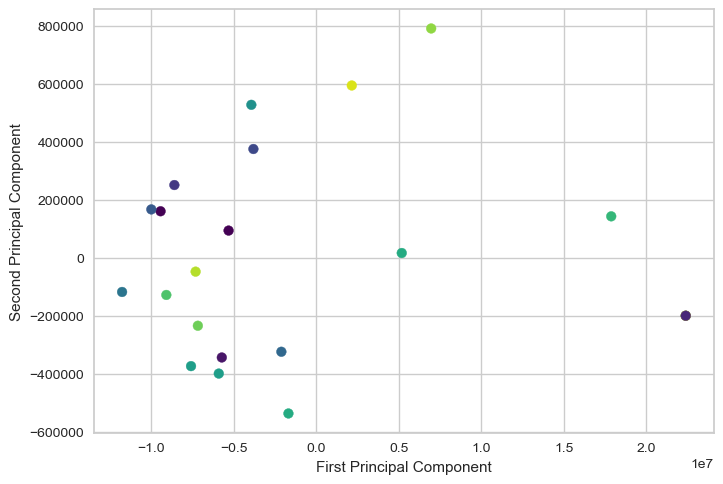

In [122]:
plt.scatter(df_pca[:, 0], df_pca[:, 1],c=kmeans.labels_,  cmap='viridis')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

In [123]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([9.99047133e-01, 9.52867196e-04, 5.42114987e-13])

In [124]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 99.9, 100. , 100. ])

 The cumulative variance array shows the percentage of the total variance in the data that is explained by each principal component and all previous components. In this case, the first principal component explains 99.9% of the total variance in the data, the second principal component explains an additional 0.1% of the variance, and the third principal component explains 100% of the variance in the data.

In [125]:
pca.components_

array([[ 9.98771326e-01, -5.57661945e-08, -1.71074723e-07,
        -2.16249585e-07, -2.12115943e-08, -2.48161623e-07,
        -6.30629390e-08,  4.95564247e-02,  5.96728986e-14,
         6.06412540e-11,  7.65138264e-08],
       [ 4.95564247e-02, -2.95419282e-06, -5.15878079e-06,
        -5.04673094e-06, -1.24358295e-06, -1.53971532e-05,
        -1.61879170e-06, -9.98771325e-01,  7.59269910e-12,
         6.10405156e-10, -1.64494839e-06],
       [ 1.15456156e-06,  8.53824938e-02,  1.63620902e-01,
         6.19545835e-01,  2.01227299e-02,  7.60042033e-01,
         6.06308617e-02, -1.60421930e-05, -1.43435174e-07,
        -3.94667961e-05,  1.88698073e-02]])

So, the first row represents the principal component that explains the most variance in the data, while the last row represents the principal component that explains the least variance in the data.

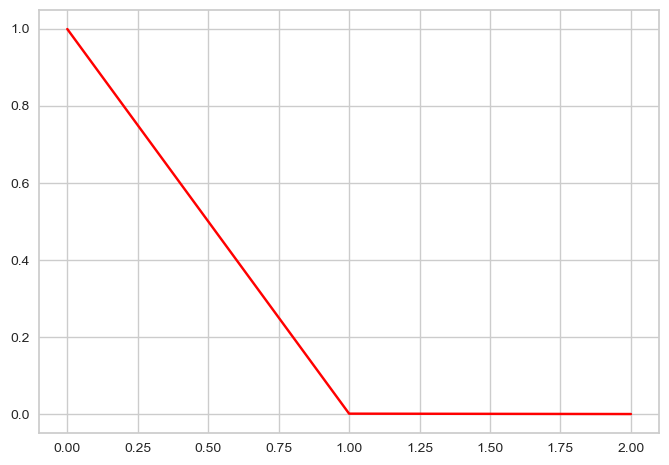

In [126]:
# Plot the variance for the PCA components
plt.plot(pca.explained_variance_ratio_, color='red')
plt.show()

# K Means

In [127]:
score=[]
K=range(1,20)

for i in K:
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(df_pca)
    score.append(kmeans.inertia_)

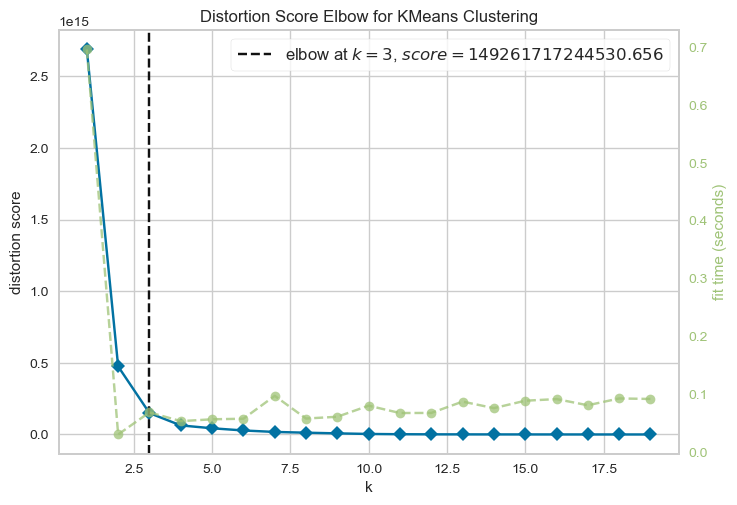

In [128]:
kmeans=KMeans()
visu=KElbowVisualizer(kmeans,k=(1,20))   
visu.fit(df_pca)
visu.poof();

In [129]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(df_pca)

KMeans(n_clusters=3, random_state=42)

In [130]:
y_pred_k=clusters_new.fit_predict(df_pca)

In [131]:
df_Arg["cluster"]=y_pred_k
df_Arg["cluster"].head()

0    2
1    1
2    2
3    1
4    1
Name: cluster, dtype: int32

In [132]:
clusters_new.labels_

array([2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1])

In [133]:
# Interpret the results
print("Cluster Centers: \n", kmeans.cluster_centers_)
print("Cluster Labels: \n", kmeans.labels_)

Cluster Centers: 
 [[-7.58567842e+06 -3.74150430e+05  3.70475843e+00]
 [ 1.78833772e+07  1.42305462e+05  2.39118675e+00]
 [ 2.15818668e+06  5.93396487e+05 -1.61058583e+00]
 [ 2.23984591e+07 -2.00392408e+05 -1.88867151e+00]
 [-3.80529249e+06  3.74396701e+05  2.93580546e+00]
 [ 5.18608288e+06  1.58525838e+04  3.83712198e+00]
 [-9.43147088e+06  1.59801749e+05 -6.85861945e+00]
 [-1.68214960e+06 -5.37386212e+05 -1.48175166e+01]
 [-5.81188054e+06 -3.72075800e+05  5.23424963e+00]
 [-1.17644380e+07 -1.18487690e+05  1.65217913e+01]
 [ 6.97061022e+06  7.89966513e+05  1.25765022e+01]
 [-8.59561099e+06  2.50212061e+05 -1.74706415e+00]
 [-5.30946922e+06  9.31745506e+04 -1.60959909e-01]
 [-7.17222537e+06 -2.34901083e+05  8.77013203e+00]
 [-9.99290996e+06  1.66172663e+05 -1.11291878e+01]
 [-9.08275362e+06 -1.28750608e+05 -2.40574425e+00]
 [-2.11058445e+06 -3.24609478e+05  3.59026691e+00]
 [-7.30718323e+06 -4.84089737e+04 -7.24840683e+00]
 [-3.93010698e+06  5.26744528e+05 -1.31519650e+01]]
Cluster Lab

In [134]:
# Evaluate the clustering results
from sklearn.metrics import silhouette_score, calinski_harabasz_score
silhouette_score = silhouette_score(df_pca, y_pred_k)
calinski_harabasz_index = calinski_harabasz_score(df_pca, y_pred_k)

In [135]:
# Print the evaluation metrics
print("Silhouette Score: ", silhouette_score)
print("Calinski-Harabasz Index: ", calinski_harabasz_index)

Silhouette Score:  0.7003070946243379
Calinski-Harabasz Index:  161.4888735016088


* **The Silhouette Score is a measure of how similar an object is to its own cluster compared to other clusters.So the Silhouette Score is 0.700, which suggests that the objects in the data set are relatively well-matched to the cluster** 
* **The Calinski-Harabasz Index is another method for evaluating the quality of a clustering algorithm.the index value is 161.489, which suggests that the clusters are well-defined and well-separated.**

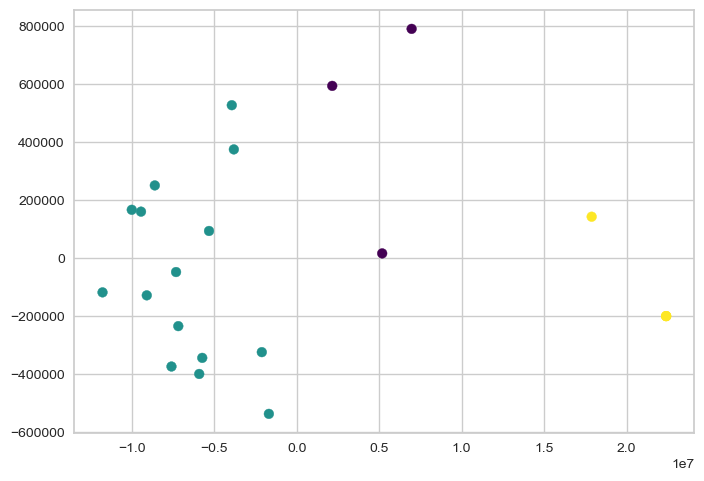

In [137]:
# Plot the results
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y_pred_k, cmap='viridis')
plt.show()